In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [14]:
ball_dataset_dir = os.path.join(os.getcwd(), 'Ball')
train_dataset_dir = os.path.join(ball_dataset_dir, 'train')
validation_dataset_dir = os.path.join(ball_dataset_dir, 'valid')
os.listdir(ball_dataset_dir)

['balls-30-(200 X 200)-98.65.h5',
 'balls.csv',
 'model',
 'test',
 'train',
 'valid']

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_dataset = train_datagen.flow_from_directory(train_dataset_dir, 
                                                  target_size = (200, 200), 
                                                  batch_size = 256, class_mode = 'categorical')

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

validation_dataset = train_datagen.flow_from_directory(validation_dataset_dir, 
                                                  target_size = (200, 200), 
                                                  batch_size = 32, class_mode = 'categorical')

Found 3615 images belonging to 30 classes.
Found 150 images belonging to 30 classes.


In [4]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.99:
            print('\nAchieved 90% accuracy. Stopping training!!!')
            self.model.stop_training = True

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (200, 200, 3),
                                  include_top = False, 
                                  weights = None) 

weight_path = os.path.join(os.getcwd(), 'Inception')

pre_trained_model.load_weights(weight_path + local_weights_file)


for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [6]:
last_desired_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_desired_layer.output_shape)
last_output = last_desired_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 10, 10, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 10, 10, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [7]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense  (30, activation='sigmoid')(x)       


model = Model(inputs=pre_trained_model.input, outputs=x)
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 22, 22, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 22, 22, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 22, 22, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 22, 22, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 22, 22, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 22, 22, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 22, 22, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 22, 22, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 10, 10, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 10, 10, 128)  384        ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 10, 10, 128)  0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 10, 10, 128)  114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 10, 10, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 10, 10, 160)  179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 10, 10, 160)  480        ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 10, 10, 160)  0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 10, 10, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 10, 10, 160)  0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 10, 10, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 10, 10, 160)  179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 10, 10, 160)  480        ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 10, 10, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 10, 10, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 10, 10, 192)  576        ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 10, 10, 192)  576        ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [8]:
callback = CustomCallBack()

history = model.fit(train_dataset,
                    validation_data = validation_dataset,
                    epochs = 100,
                    callbacks=[callback])

Epoch 1/100
15/15 [==============================] - 87s 6s/step - loss: 1.6800 - accuracy: 0.5781 - val_loss: 0.8025 - val_accuracy: 0.7267
Epoch 2/100
15/15 [==============================] - 88s 6s/step - loss: 0.5528 - accuracy: 0.8495 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 3/100
15/15 [==============================] - 91s 6s/step - loss: 0.4280 - accuracy: 0.8761 - val_loss: 0.4042 - val_accuracy: 0.8667
Epoch 4/100
15/15 [==============================] - 106s 7s/step - loss: 0.3184 - accuracy: 0.9112 - val_loss: 0.2736 - val_accuracy: 0.9000
Epoch 5/100
15/15 [==============================] - 104s 7s/step - loss: 0.3258 - accuracy: 0.9115 - val_loss: 0.1694 - val_accuracy: 0.9467
Epoch 6/100
15/15 [==============================] - 101s 7s/step - loss: 0.2350 - accuracy: 0.9239 - val_loss: 0.2608 - val_accuracy: 0.9200
Epoch 7/100
15/15 [==============================] - 100s 7s/step - loss: 0.1971 - accuracy: 0.9389 - val_loss: 0.2427 - val_accuracy: 0.9200
Epoch 8/1

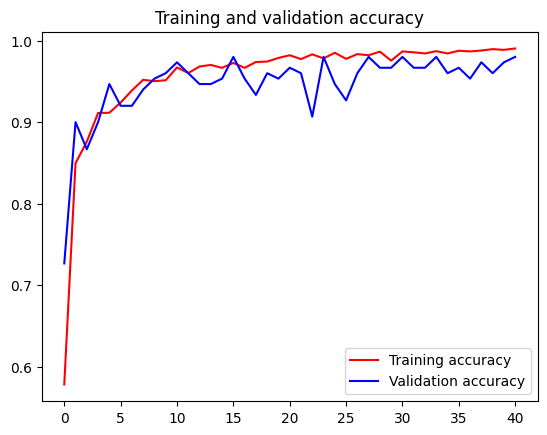

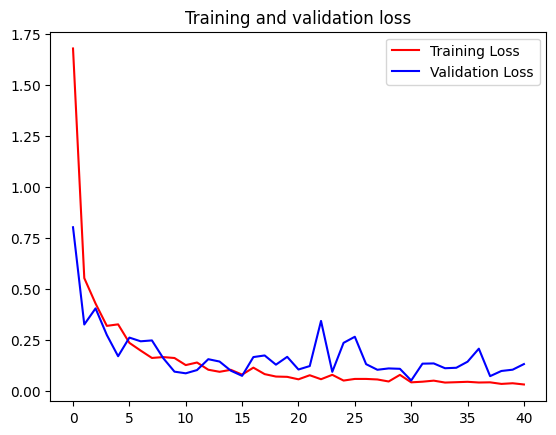

In [9]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
label_dict = {}
data_dir = os.listdir(train_dataset_dir) 
for i in range(len(data_dir)):
    label_dict[i] = data_dir[i]

In [17]:
label_dict

{0: 'baseball',
 1: 'basketball',
 2: 'beachballs',
 3: 'billiard ball',
 4: 'bowling ball',
 5: 'brass',
 6: 'buckeyballs',
 7: 'cannon ball',
 8: 'chrochet ball',
 9: 'cricket ball',
 10: 'crystal ball',
 11: 'eyeballs',
 12: 'football',
 13: 'golf ball',
 14: 'marble',
 15: 'meat ball',
 16: 'medicine ball',
 17: 'paint balls',
 18: 'pokeman balls',
 19: 'puffballs',
 20: 'rubberband ball',
 21: 'screwballs',
 22: 'sepak takraw ball',
 23: 'soccer ball',
 24: 'tennis ball',
 25: 'tether ball',
 26: 'volley ball',
 27: 'water polo ball',
 28: 'wiffle ball',
 29: 'wrecking ball'}

1/1 [==============================] - 0s 68ms/step


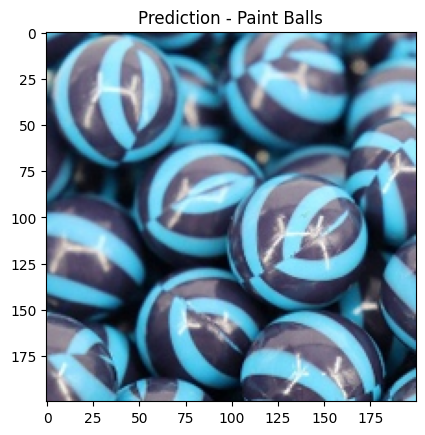

In [28]:
test_image_dir = train_dataset_dir = os.path.join(ball_dataset_dir, 'test/paint balls')
test_image = Image.open(os.path.join(test_image_dir,'4.jpg' ))
test_image = test_image.resize((200, 200))
test_image_array = np.copy(test_image) / 255.
test_image_array = np.expand_dims(test_image_array, axis = 0)
pred = model.predict(test_image_array)
pred = np.argmax(pred[0])

plt.title("Prediction - {}".format(str(label_dict[pred].title()), size=18, color='red'))
plt.imshow(test_image_array[0])

1/1 [==============================] - 0s 62ms/step


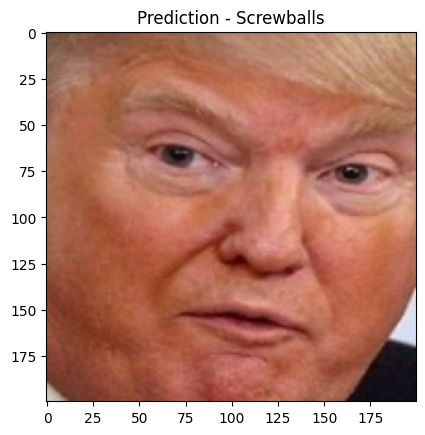

In [27]:
test_image_dir = train_dataset_dir = os.path.join(ball_dataset_dir, 'test/screwballs')
test_image = Image.open(os.path.join(test_image_dir,'3.jpg' ))
test_image = test_image.resize((200, 200))
test_image_array = np.copy(test_image) / 255.
test_image_array = np.expand_dims(test_image_array, axis = 0)
pred = model.predict(test_image_array)
pred = np.argmax(pred[0])

plt.title("Prediction - {}".format(str(label_dict[pred].title()), size=18, color='red'))
plt.imshow(test_image_array[0])

In [33]:
test_directory = os.path.join(ball_dataset_dir, 'test_images')
image_list =  os.listdir(test_directory)
test_array = np.zeros((len(image_list), 200, 200, 3))

for i in range(len(image_list)):
    test_image = Image.open(os.path.join(test_directory, image_list[i]))
    test_image = test_image.resize((200, 200))
    test_image_array = np.copy(test_image) / 255.
    test_array[i] = test_image_array
    

In [35]:
pred_array = model.predict(test_array)

1/1 [==============================] - 0s 177ms/step


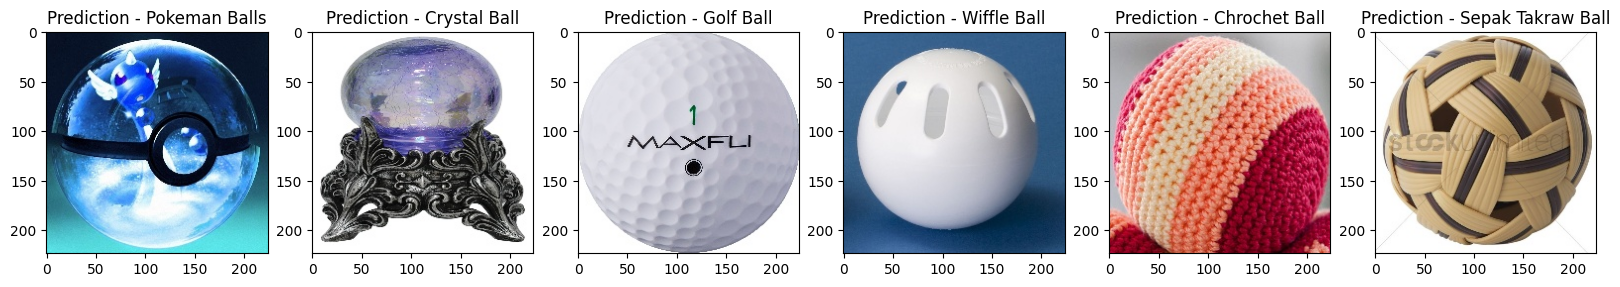

In [48]:
plt.figure(figsize=(20, 8))

for i in range(0, 6):
    plt.subplot(1, 6, i + 1)
    test_image = Image.open(os.path.join(test_directory, image_list[i]))
    #test_image = test_image.resize((200, 200))
    test_image_array = np.copy(test_image) 
    pred = np.argmax(pred_array[i])
    plt.title("Prediction - {}".format(str(label_dict[pred].title()), size=18, color='red'))
    plt.imshow(test_image_array)
    
plt.show()